In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./data/bitcoin_data.csv', date_parser = True)
df.drop(df.columns[0], axis=1,inplace = True)
df.tail()

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
19428,50884.48,50921.61,51204.77,50666.00,1312.93360,2021-12-07 19:00:00,0.999271,-0.000729,1.004981,0.0039,23
19429,50441.59,50884.49,51006.20,50150.00,2194.52091,2021-12-07 20:00:00,0.991296,-0.008742,1.004981,0.0039,23
19430,50489.92,50441.59,50856.46,50358.99,1468.15088,2021-12-07 21:00:00,1.000958,0.000958,1.004981,0.0039,23
19431,50245.25,50489.93,50626.43,50039.74,1362.13177,2021-12-07 22:00:00,0.995154,-0.004858,1.004981,0.0039,23
19432,50588.95,50245.25,50710.99,50141.60,828.39608,2021-12-07 23:00:00,1.006840,0.006817,1.004981,0.0039,22


In [3]:
data_training = df[df['NewDateTime']>= '2020-01-01'].copy()
data_training = data_training[data_training['NewDateTime']< '2021-10-08'].copy()
data_training

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
0,8431.82,8145.28,8455.00,8142.00,11041.870000,2020-01-08 00:00:00,1.035179,0.034574,1.011291,0.0100,89
1,8370.92,8431.82,8448.14,8328.89,7355.820000,2020-01-08 01:00:00,0.992777,-0.007249,1.011291,0.0100,86
2,8278.59,8370.92,8422.00,8256.74,4048.910000,2020-01-08 02:00:00,0.988970,-0.011091,1.011291,0.0100,75
3,8300.34,8278.59,8344.00,8244.93,3947.380000,2020-01-08 03:00:00,1.002627,0.002624,1.011291,0.0100,68
4,8344.63,8300.34,8355.87,8288.00,2374.550000,2020-01-08 04:00:00,1.005336,0.005322,1.011291,0.0100,68
5,8334.77,8344.63,8377.00,8307.85,2376.440000,2020-01-08 05:00:00,0.998818,-0.001182,1.011291,0.0100,70
6,8339.13,8334.77,8367.61,8319.00,1562.870000,2020-01-08 06:00:00,1.000523,0.000523,1.011291,0.0100,72
7,8297.26,8339.13,8347.99,8277.21,2539.820000,2020-01-08 07:00:00,0.994979,-0.005034,1.011291,0.0100,67
8,8312.04,8297.26,8329.09,8264.86,2289.270000,2020-01-08 08:00:00,1.001781,0.001780,1.011291,0.0125,66
9,8297.21,8312.04,8321.83,8276.00,1892.300000,2020-01-08 09:00:00,0.998216,-0.001786,1.011291,0.0125,69


In [4]:
data_test = df[df['NewDateTime']>= '2021-10-08'].copy()
data_test

,close,open,high,low,Volume BTC,NewDateTime,returns,log_returns,SOPR,fundingRate,googleTrend
17969,54108.00,53785.22,54235.99,53711.57,1319.71058,2021-10-08 00:00:00,1.006001,0.005983,1.003487,0.0326,56
17970,54297.35,54108.01,54397.00,54051.10,1107.57340,2021-10-08 01:00:00,1.003499,0.003493,1.003487,0.0326,56
17971,53842.00,54297.35,54429.99,53776.50,1547.30709,2021-10-08 02:00:00,0.991614,-0.008422,1.003487,0.0326,56
17972,53815.22,53842.01,53940.00,53691.02,1401.24886,2021-10-08 03:00:00,0.999503,-0.000498,1.003487,0.0326,56
17973,53877.93,53815.21,53972.94,53766.28,1097.26855,2021-10-08 04:00:00,1.001165,0.001165,1.003487,0.0326,56
17974,54172.95,53877.92,54174.00,53617.61,1644.31622,2021-10-08 05:00:00,1.005476,0.005461,1.003487,0.0326,56
17975,54110.22,54172.94,54286.90,53999.99,1579.99547,2021-10-08 06:00:00,0.998842,-0.001159,1.003487,0.0326,56
17976,54829.39,54110.23,54967.97,54000.00,3718.09256,2021-10-08 07:00:00,1.013291,0.013203,1.003487,0.0326,56
17977,55800.01,54829.38,56100.00,54753.66,6855.22152,2021-10-08 08:00:00,1.017703,0.017548,1.003487,0.0333,56
17978,55234.76,55800.00,56000.00,55105.00,3003.36631,2021-10-08 09:00:00,0.989870,-0.010182,1.003487,0.0333,56


In [5]:
training_data = data_training.drop(['NewDateTime'], axis = 1)
training_data.head()

,close,open,high,low,Volume BTC,returns,log_returns,SOPR,fundingRate,googleTrend
0,8431.82,8145.28,8455.00,8142.00,11041.87,1.035179,0.034574,1.011291,0.01,89
1,8370.92,8431.82,8448.14,8328.89,7355.82,0.992777,-0.007249,1.011291,0.01,86
2,8278.59,8370.92,8422.00,8256.74,4048.91,0.988970,-0.011091,1.011291,0.01,75
3,8300.34,8278.59,8344.00,8244.93,3947.38,1.002627,0.002624,1.011291,0.01,68
4,8344.63,8300.34,8355.87,8288.00,2374.55,1.005336,0.005322,1.011291,0.01,68


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.07115667, 0.0664163 , 0.06382378, ..., 0.61500701, 0.51666667,
        0.88297872],
       [0.07014917, 0.07115668, 0.06370991, ..., 0.61500701, 0.51666667,
        0.85106383],
       [0.0686217 , 0.07014918, 0.06327601, ..., 0.61500701, 0.51666667,
        0.73404255],
       ...,
       [0.82957459, 0.82778075, 0.82813226, ..., 0.59014876, 0.5485    ,
        0.61702128],
       [0.82335042, 0.82957456, 0.83046112, ..., 0.59014876, 0.5485    ,
        0.61702128],
       [0.82146165, 0.82328736, 0.81924839, ..., 0.59014876, 0.5485    ,
        0.61702128]])

In [7]:
X_train = []
Y_train = []

In [8]:
training_data.shape[0]

17969

In [9]:
for i in range(192, training_data.shape[0]):
    X_train.append(training_data[i-192:i-24])
    Y_train.append(training_data[i-24:i,0])

In [10]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [23]:
X_train[0,0,0]

0.07115666682438156

In [12]:
Y_train.shape

(17777, 24)

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
regressor = Sequential()
regressor.add(LSTM(units = 168, activation = 'relu', input_shape = (X_train.shape[1], 10)))
regressor.add(Dropout(0.1))

In [22]:
# regressor.add(LSTM(units = 15, activation = 'relu', return_sequences = True))
# regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 20, activation = 'relu'))
regressor.add(Dropout(0.1))

regressor.add(Dense(units =1))
regressor.add(LSTM(24, activation='relu'))

ValueError: Input 0 of layer lstm_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 168)

In [16]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 168, 10)           840       
_________________________________________________________________
dropout (Dropout)            (None, 168, 10)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 168, 20)           2480      
_________________________________________________________________
dropout_1 (Dropout)          (None, 168, 20)           0         
_________________________________________________________________
dense (Dense)                (None, 168, 1)            21        
_________________________________________________________________
lstm_2 (LSTM)                (None, 24)                2496      
Total params: 5,837
Trainable params: 5,837
Non-trainable params: 0
______________________________________________________

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
history = regressor.fit(X_train, Y_train, epochs = 15, batch_size =100)

Epoch 1/15
178/178 [==============================] - 139s 759ms/step - loss: 22.4317
Epoch 2/15
178/178 [==============================] - 135s 762ms/step - loss: 0.1674
Epoch 3/15
 97/178 [===============>..............] - ETA: 1:01 - loss: 0.1691

KeyboardInterrupt: 

In [28]:
 regressor.save("LSTM_model_1212.h5")

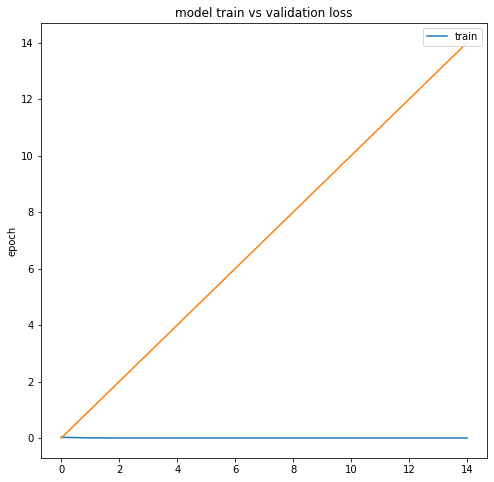

In [29]:
loss = history.history['loss']
epoch = range(len(loss))
plt.figure(figsize=(8,8))
plt.plot(loss)
plt.plot(epoch)
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.ylabel('epoch')
plt.legend(['train'],loc='upper right')
plt.show()

In [29]:
# from tensorflow import keras
# regressor = Sequential()
# regressor = keras.models.load_model("LSTM_model_1210.h5")

In [31]:
past_60_days = data_training.tail(168)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['NewDateTime'], axis = 1)
len(df)

1632

In [32]:
inputs = scaler.transform(df)
inputs

array([[0.65452527, 0.65660208, 0.6548204 , ..., 0.57821885, 0.51533333,
        0.56382979],
       [0.65532366, 0.65455284, 0.65058661, ..., 0.57821885, 0.51533333,
        0.56382979],
       [0.64930628, 0.65532376, 0.65043639, ..., 0.57821885, 0.51533333,
        0.56382979],
       ...,
       [0.76694578, 0.76614636, 0.76765255, ..., 0.57712974, 0.5065    ,
        0.18085106],
       [0.76289807, 0.76694607, 0.76383424, ..., 0.57712974, 0.5065    ,
        0.18085106],
       [0.76858408, 0.7628982 , 0.76523787, ..., 0.57712974, 0.5065    ,
        0.17021277]])

In [33]:
X_test = []
Y_test = []
for i in range(192, inputs.shape[0]):
    X_test.append(inputs[i-192:i-24])
    Y_test.append(inputs[i-24:i,0])

In [34]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((1440, 168, 10), (1440, 24))

In [35]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

(array([[0.7538702 ],
        [0.753751  ],
        [0.7537996 ],
        ...,
        [0.6621934 ],
        [0.6634558 ],
        [0.66507816]], dtype=float32),
 array([[0.82680156, 0.82993408, 0.82240099, ..., 0.82769822, 0.8260083 ,
         0.82421135],
        [0.82993408, 0.82240099, 0.82195795, ..., 0.8260083 , 0.82421135,
         0.82938517],
        [0.82240099, 0.82195795, 0.8229954 , ..., 0.82421135, 0.82938517,
         0.82513977],
        ...,
        [0.75982048, 0.77108149, 0.76615169, ..., 0.77408745, 0.77347319,
         0.76614623],
        [0.77108149, 0.76615169, 0.76933896, ..., 0.77347319, 0.76614623,
         0.76694578],
        [0.76615169, 0.76933896, 0.76902613, ..., 0.76614623, 0.76694578,
         0.76289807]]))

In [36]:
Y_pred.shape

(1440, 1)

In [35]:
scaler.scale_

array([1.65435222e-05, 1.65435249e-05, 1.65991634e-05, 1.65295076e-05,
       2.11614415e-05, 1.91062882e+00, 1.69385841e+00, 6.00335094e+00])

In [36]:
scale = 1/1.65435222e-05
scale

60446.62000695354

In [37]:
# scale.inverse_transform(Y_pred)

AttributeError: 'float' object has no attribute 'inverse_transform'

In [38]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [39]:
Y_pred.shape

(1464, 1)

In [40]:
Y_test


array([49977.36000575, 50166.71000577, 49711.36000572, ...,
       46359.28000533, 46114.6100053 , 46458.31000534])

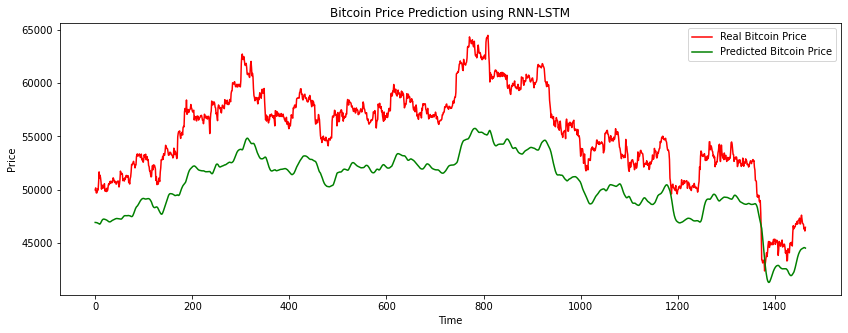

In [41]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()